#Imports needed for this research

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import warnings
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#to set dimensions of the figures
plt.rcParams['figure.figsize'] = (15,7)


In [56]:
# import for the upload files
#from google.colab import drive 
#drive.mount('/content/gdrive')

#Upload and organize dataset parameters

In [57]:
# import the dataset
#data_climate_test_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/fortaleza_junho_julho.csv")

data_climate_test_train = pd.read_csv("fortaleza_junho_julho.csv")

#Correting column's names
data_climate_test_train.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']
data_climate_test_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 20 columns):
codigo_estacao      1464 non-null object
data                1464 non-null object
hora                1464 non-null int64
temp_inst           1464 non-null float64
temp_max            1464 non-null float64
temp_min            1464 non-null float64
umid_inst           1464 non-null int64
umid_max            1464 non-null int64
umid_min            1464 non-null int64
pto_orvalho_inst    1464 non-null float64
pto_orvalho_max     1464 non-null float64
pto_orvalho_min     1464 non-null float64
pressao             1464 non-null float64
pressao_max         1464 non-null float64
pressao_min         1464 non-null float64
vento_direcao       1464 non-null float64
vento_vel           1464 non-null int64
vento_rajada        1464 non-null float64
radiacao            1464 non-null float64
precipitacao        1464 non-null float64
dtypes: float64(13), int64(5), object(2)
memory usage: 217.4+ KB


**Create new variables for train neural network**

In [58]:
# dif into temp_max and temp_min
diff_temp_test_train     = data_climate_test_train.temp_max - data_climate_test_train.temp_min

# diff between umid_max umid_min
diff_umid_test_train     = data_climate_test_train.umid_max - data_climate_test_train.umid_min

# diff betwenn dew_max and dew_min
diff_dew_test_train      = data_climate_test_train.pto_orvalho_max - data_climate_test_train.pto_orvalho_min

#diff between pressue_max and pressure_min
diff_pressure_test_train = data_climate_test_train.pressao_max - data_climate_test_train.pressao_min

# diff between wind_direction and wind_guest
diff_wind_test_train     = data_climate_test_train.vento_rajada - data_climate_test_train.vento_direcao


In [59]:
new_dataset_test_train = pd.DataFrame(data_climate_test_train[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','vento_vel']])
new_dataset_test_train.head()

,hora,temp_inst,umid_inst,pto_orvalho_inst,pressao,vento_rajada,radiacao,precipitacao,vento_vel
0,0,26.6,79,22.6,1009.9,4.8,-3.51,0.0,104
1,23,26.0,79,22.1,1010.0,4.2,-3.54,0.0,121
2,22,26.7,75,21.8,1009.2,5.5,-3.54,0.0,94
3,21,27.1,72,21.6,1009.0,6.9,70.21,0.0,91
4,20,28.1,66,21.2,1008.4,7.4,688.50,0.0,103


In [60]:
#Add new variables into data set
new_dataset_test_train['diff_temp']     = diff_temp_test_train
new_dataset_test_train['diff_umid']     = diff_umid_test_train
new_dataset_test_train['diff_dew']      = diff_dew_test_train
new_dataset_test_train['diff_pressure'] = diff_pressure_test_train
new_dataset_test_train['diff_wind']     = diff_wind_test_train
new_dataset_test_train.head()

,hora,temp_inst,umid_inst,pto_orvalho_inst,pressao,vento_rajada,radiacao,precipitacao,vento_vel,diff_temp,diff_umid,diff_dew,diff_pressure,diff_wind
0,0,26.6,79,22.6,1009.9,4.8,-3.51,0.0,104,0.4,2,0.3,0.7,3.4
1,23,26.0,79,22.1,1010.0,4.2,-3.54,0.0,121,0.9,4,0.4,0.8,3.7
2,22,26.7,75,21.8,1009.2,5.5,-3.54,0.0,94,0.5,3,0.3,0.2,3.8
3,21,27.1,72,21.6,1009.0,6.9,70.21,0.0,91,1.2,6,0.4,0.6,4.8
4,20,28.1,66,21.2,1008.4,7.4,688.50,0.0,103,1.2,6,1.0,0.5,4.5


In [61]:
#To analyse correlation pearson
new_dataset_test_train.corr()["vento_vel"]

hora               -0.383448
temp_inst          -0.508016
umid_inst           0.406688
pto_orvalho_inst   -0.019486
pressao             0.237491
vento_rajada       -0.473471
radiacao           -0.203865
precipitacao        0.000217
vento_vel           1.000000
diff_temp          -0.007007
diff_umid          -0.113203
diff_dew           -0.194993
diff_pressure      -0.104964
diff_wind          -0.447528
Name: vento_vel, dtype: float64

# Divide train and test datasets

In [62]:
x_all = new_dataset_test_train[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','diff_temp','diff_umid','diff_dew','diff_pressure','diff_wind','vento_vel']]
y_all = new_dataset_test_train[['vento_vel']]

x = x_all[:732]
y = y_all[732:]

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

print('x_all:{}'.format(x_all.shape))
print('y_all:{}'.format(y_all.shape))
print('x:{}'.format(x.shape))
print('y:{}'.format(y.shape))
print('train_x:{}'.format(train_x.shape))
print('train_y:{}'.format(train_y.shape))
print('test_x:{}'.format(test_x.shape))
print('test_y:{}'.format(test_y.shape))


x_all:(1464, 14)
y_all:(1464, 1)
x:(732, 14)
y:(732, 1)
train_x:(585, 14)
train_y:(585, 1)
test_x:(147, 14)
test_y:(147, 1)


#  Apllying MLPRegressor

In [63]:
def test_mlp(i,j):
    warnings.filterwarnings('ignore')
    MLP_reg = MLPRegressor(hidden_layer_sizes = (i*30,j*30), activation='tanh',
                      verbose=False, warm_start=True,
                      max_iter = 300)
    
    MLP_reg.fit(train_x,train_y)#Kernel default : RBF 
    predicts = MLP_reg.predict(test_x)

    rmse = math.sqrt(mean_squared_error(test_y,predicts))
    score_r2 = r2_score(test_y,predicts)

    return i*30,j*30,rmse,score_r2

In [64]:
#Creating a dataset for store rmse and r2 results
values = pd.DataFrame(columns=['i','j','rmse','r2'])
values.head()

,i,j,rmse,r2


#Cycle for try differents neural networks structures 


In [65]:

#To mesure time processing
import time 
inicio = time.time()

a = 0
#Begin cycle for
for i in range(1,21):
    for j in range(1,21): 
           values.loc[a]=test_mlp(i,j)
           a = a + 1
#End cycle for
              
fim = time.time()
print(fim-inicio)


6389.129741191864


In [66]:
#Storing the results

values.to_csv('values_all.csv')
values_all = pd.read_csv('values_all.csv')
values_all.head()


,Unnamed: 0,i,j,rmse,r2
0,0,30.0,30.0,105.809962,-10.102549
1,1,30.0,60.0,79.045576,-5.196190
2,2,30.0,90.0,60.396184,-2.617334
3,3,30.0,120.0,46.070393,-1.104813
4,4,30.0,150.0,38.564217,-0.474819


In [67]:
values_all.describe()

,Unnamed: 0,i,j,rmse,r2
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,315.000000,315.000000,41.347244,-1.063113
std,115.614301,173.205081,173.205081,19.281242,2.453615
min,0.000000,30.000000,30.000000,31.300398,-10.301044
25%,99.750000,172.500000,172.500000,32.142120,-0.337046
50%,199.500000,315.000000,315.000000,32.401487,-0.041117
75%,299.250000,457.500000,457.500000,36.703066,-0.024516
max,399.000000,600.000000,600.000000,106.751625,0.028441


#Ploting the results

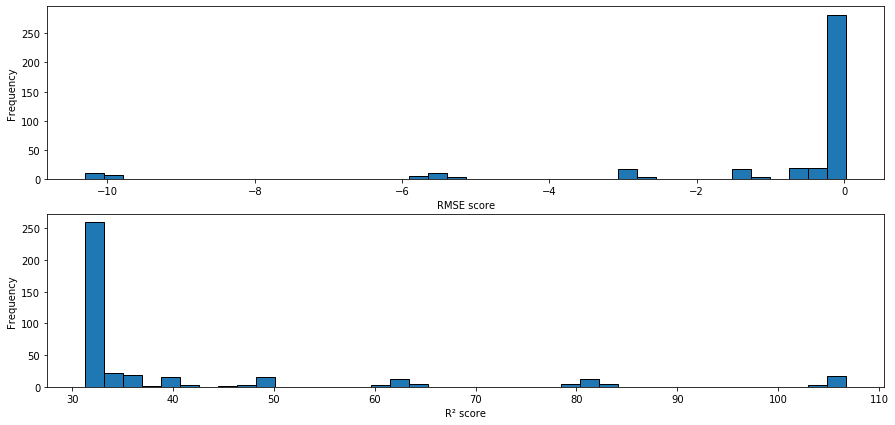

In [68]:
plt.title('Result with all variables')

plt.subplot(2, 1, 1)
values_all.r2.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2, 1, 2)
values_all.rmse.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

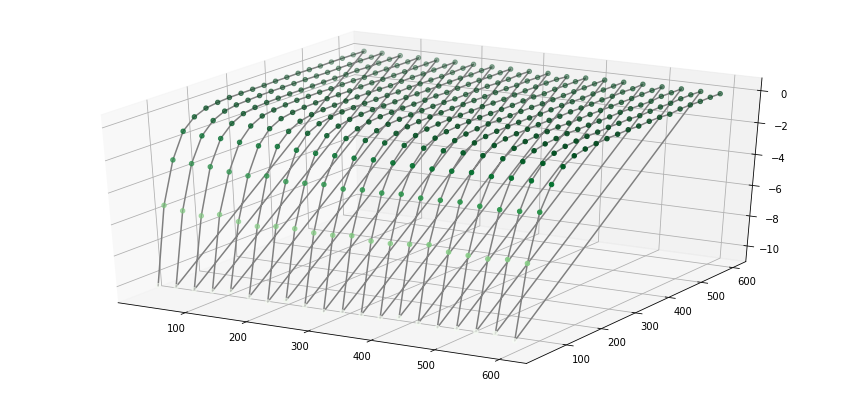

In [69]:
ax = plt.axes(projection='3d')
ax.plot3D(values_all.i, values_all.j, values_all.r2, 'gray')
ax.scatter3D(values_all.i, values_all.j, values_all.r2, c=values_all.r2, cmap='Greens');


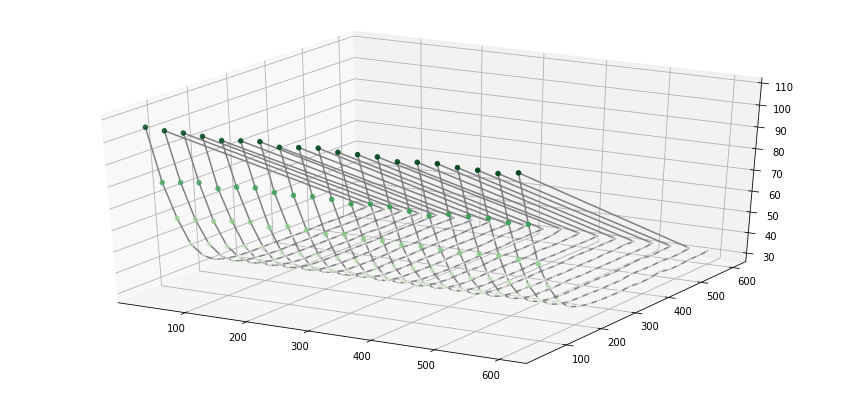

In [70]:
ax = plt.axes(projection='3d')
ax.plot3D(values_all.i, values_all.j, values_all.rmse, 'gray')
ax.scatter3D(values_all.i, values_all.j, values_all.rmse, c=values_all.rmse, cmap='Greens');

#Evaluating each dataset's parameter


In [71]:
#Inputs
var_temp_inst     = new_dataset_test_train[['temp_inst']]
var_umid_inst     = new_dataset_test_train[['umid_inst']]
var_dew_inst      = new_dataset_test_train[['pto_orvalho_inst']] 
var_hour          = new_dataset_test_train[['hora']]
var_pressure      = new_dataset_test_train[['pressao']]
var_wind_guest    = new_dataset_test_train[['vento_rajada']]
var_radiation     = new_dataset_test_train[['radiacao']]
var_precipitation = new_dataset_test_train[['precipitacao']]
var_diff_temp      = new_dataset_test_train[['diff_temp']]
var_diff_umid      = new_dataset_test_train[['diff_umid']]
var_diff_dew       = new_dataset_test_train[['diff_dew']]
var_diff_pressure  = new_dataset_test_train[['diff_pressure']]

#Outputs
var_wind_speed =new_dataset_test_train.vento_vel

In [72]:
# Function for try mlp with each parameters
def net_mlp(i,j):
    
    warnings.filterwarnings('ignore')
    
    MLP_reg = MLPRegressor(hidden_layer_sizes = (i*30,j*30), activation='tanh',
                      verbose=False, warm_start=False,
                      max_iter = 300)

    return MLP_reg  

  
# Function for measure results
def train_test_score_var(x,i,j):
    
    MLP_reg = net_mlp(i,j)
    
    train_x,test_x,train_y,test_y = train_test_split(x,var_wind_speed,
                                                     test_size=0.2)
    
    MLP_reg.fit(train_x,train_y)#Kernel default : RBF 
    predicts = MLP_reg.predict(test_x)
    
    rmse = math.sqrt(mean_squared_error(test_y,predicts))
    score_r2 = r2_score(test_y,predicts)
  
    return score_r2,rmse
  
  
# Do net_mlp function with each parameters  
def testing_all_of_them(i,j):
    
    r2_temp_inst,rmse_temp_inst            = train_test_score_var(var_temp_inst,i,j) 
    r2_umid_inst,rmse_umid_inst            = train_test_score_var(var_umid_inst,i,j)
    r2_pto_orvalho_inst,rmse_pto_orvalho   = train_test_score_var(var_dew_inst,i,j)
    r2_hour,rmse_hour                      = train_test_score_var(var_hour,i,j) 
    r2_pressure,rmse_pressure              = train_test_score_var(var_pressure,i,j) 
    r2_wind_guest,rmse_wind_guest          = train_test_score_var(var_wind_guest,i,j)
    r2_radiation,rmse_radiation            = train_test_score_var(var_radiation,i,j)
    r2_precipitation,rmse_precipitation    = train_test_score_var(var_precipitation,i,j)
    r2_diff_temp,rmse_diff_temp              = train_test_score_var(var_diff_temp,i,j) 
    r2_diff_umid,rmse_diff_umid              = train_test_score_var(var_diff_umid,i,j)
    r2_diff_dew,rmse_diff_dew                = train_test_score_var(var_diff_dew,i,j)
    r2_diff_pressure,rmse_diff_pressure      = train_test_score_var(var_diff_pressure,i,j)
  
    return r2_temp_inst,r2_umid_inst,r2_pto_orvalho_inst,r2_hour,r2_pressure,r2_wind_guest,r2_radiation,r2_precipitation,r2_diff_temp,r2_diff_umid,r2_diff_dew,r2_diff_pressure,rmse_temp_inst ,rmse_umid_inst ,rmse_pto_orvalho ,rmse_hour,rmse_pressure ,rmse_wind_guest,rmse_radiation ,rmse_precipitation,rmse_diff_temp ,rmse_diff_umid ,rmse_diff_dew,rmse_diff_pressure 
  
  

In [73]:
values_for_each_var = pd.DataFrame(columns=[
    'r2_temp_inst','rmse_temp_inst',          
    'r2_umid_inst','rmse_umid_inst',       
    'r2_pto_orvalho_inst','rmse_pto_orvalho',   
    'r2_hour','rmse_hour',                     
    'r2_pressure','rmse_pressure',             
    'r2_wind_guest','rmse_wind_guest',          
    'r2_radiation','rmse_radiation',          
    'r2_precipitation','rmse_precipitation',    
    'r2_diff_temp','rmse_diff_temp',               
    'r2_diff_umid','rmse_diff_umid',              
    'r2_diff_dew','rmse_diff_dew',                
    'r2_diff_pressure','rmse_diff_pressure'     ])

values_for_each_var.head()


,r2_temp_inst,rmse_temp_inst,r2_umid_inst,rmse_umid_inst,r2_pto_orvalho_inst,rmse_pto_orvalho,r2_hour,rmse_hour,r2_pressure,rmse_pressure,...,r2_precipitation,rmse_precipitation,r2_diff_temp,rmse_diff_temp,r2_diff_umid,rmse_diff_umid,r2_diff_dew,rmse_diff_dew,r2_diff_pressure,rmse_diff_pressure


#Cycle for try differents neural networks structures with each variables




In [74]:

import time 
start = time.time()
a = 0
for i in range(1,21):
    for j in range(1,21): 
           values_for_each_var.loc[a] = testing_all_of_them(i,j) 
           a = a + 1
end = time.time()
print(start-end)


-145898.98285388947


In [75]:
#Storing the results
values_for_each_var.to_csv('values_for_each_var.csv')
values_for_each_var = pd.read_csv('values_for_each_var.csv')
values_for_each_var.head()

,Unnamed: 0,r2_temp_inst,rmse_temp_inst,r2_umid_inst,rmse_umid_inst,r2_pto_orvalho_inst,rmse_pto_orvalho,r2_hour,rmse_hour,r2_pressure,...,r2_precipitation,rmse_precipitation,r2_diff_temp,rmse_diff_temp,r2_diff_umid,rmse_diff_umid,r2_diff_dew,rmse_diff_dew,r2_diff_pressure,rmse_diff_pressure
0,0,-5.244595,-5.758688,-5.842434,-6.056834,-5.550341,-5.482784,-5.014317,-5.286466,-4.618008,...,81.433583,79.604450,79.856128,83.044311,79.328607,81.528624,75.699300,79.565314,78.884176,81.727385
1,1,-1.224082,-1.284908,-1.341008,-1.083461,-1.292954,-1.189168,-0.939463,-1.080171,-1.064762,...,48.917041,46.015113,46.971840,47.741497,43.975028,46.366864,46.319992,47.377758,42.526098,46.859536
2,2,-0.161673,-0.153061,-0.158423,-0.063341,-0.182672,-0.182780,-0.133359,-0.066440,-0.125719,...,33.654830,31.168533,35.018593,36.015193,35.423676,32.507412,33.367377,36.875534,32.991879,33.883125
3,3,-0.030507,-0.000872,-0.002595,0.000623,-0.008888,-0.014366,-0.006158,-0.001120,-0.006404,...,31.276572,31.820144,32.497273,31.606571,30.789212,31.766238,31.834036,30.844859,31.287237,32.757884
4,4,-0.006555,0.001139,-0.011477,-0.023035,-0.024670,-0.001303,-0.001888,-0.001064,-0.013298,...,33.620994,30.641574,32.716683,33.533403,32.569503,31.935131,32.866254,32.270680,30.990253,31.386292


#Ploting results

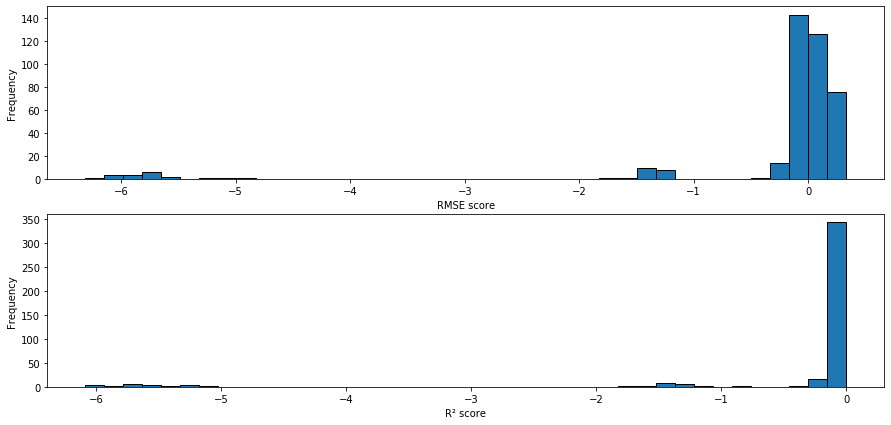

In [76]:
plt.title("Tempeture inst results")

plt.subplot(2,1,1)
values_for_each_var.rmse_temp_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_temp_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()



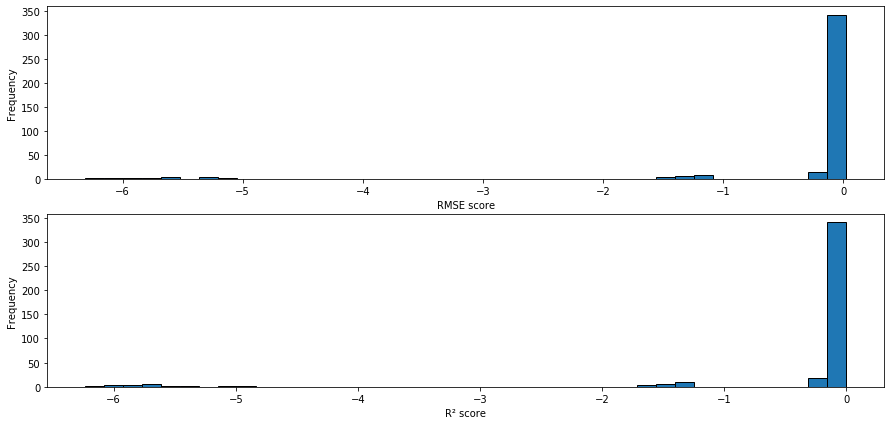

In [77]:
plt.title("Humidity inst results")

plt.subplot(2,1,1)
values_for_each_var.rmse_umid_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_umid_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()


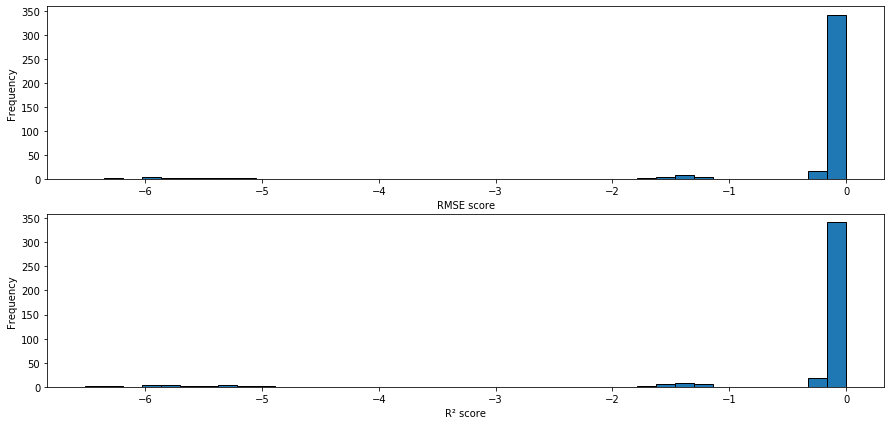

In [80]:
plt.title("dew results")

plt.subplot(2,1,1)
values_for_each_var.r2_pto_orvalho_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_pto_orvalho_inst.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

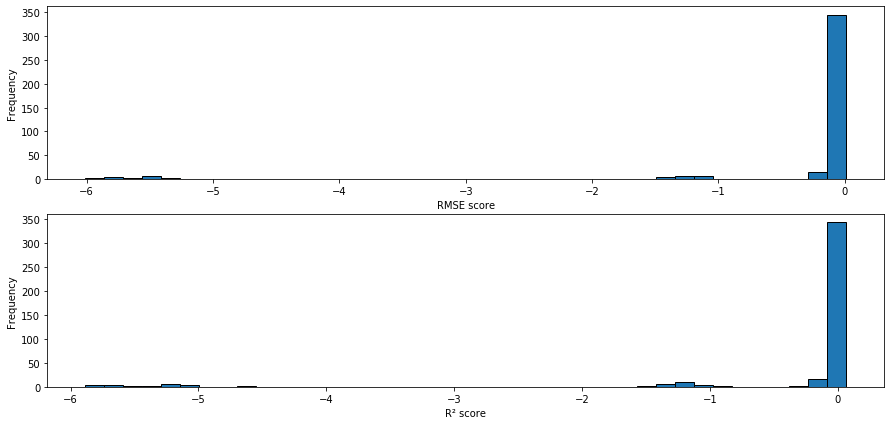

In [81]:
plt.title("hours results")

plt.subplot(2,1,1)
values_for_each_var.rmse_hour.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_hour.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

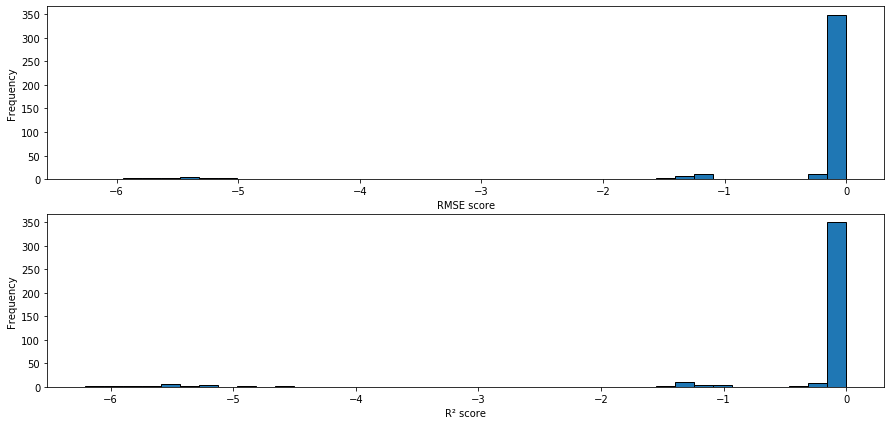

In [82]:
plt.title("pressure results")

plt.subplot(2,1,1)
values_for_each_var.rmse_pressure.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_pressure.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

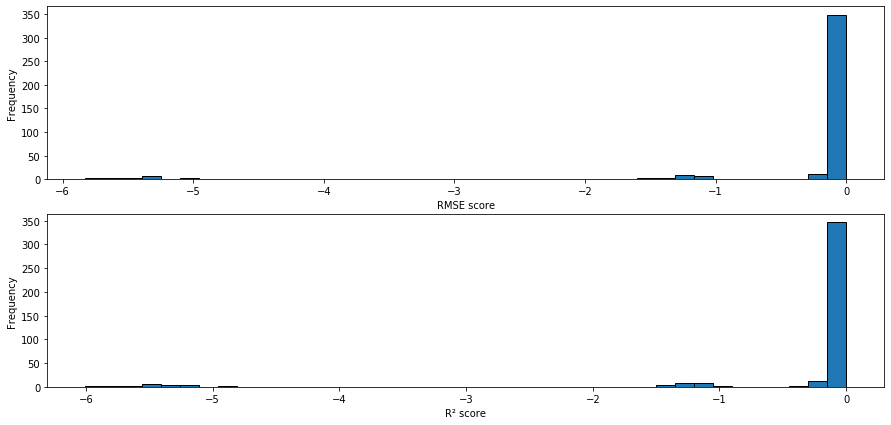

In [83]:
plt.title("wind guest results")

plt.subplot(2,1,1)
values_for_each_var.rmse_wind_guest.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_wind_guest.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

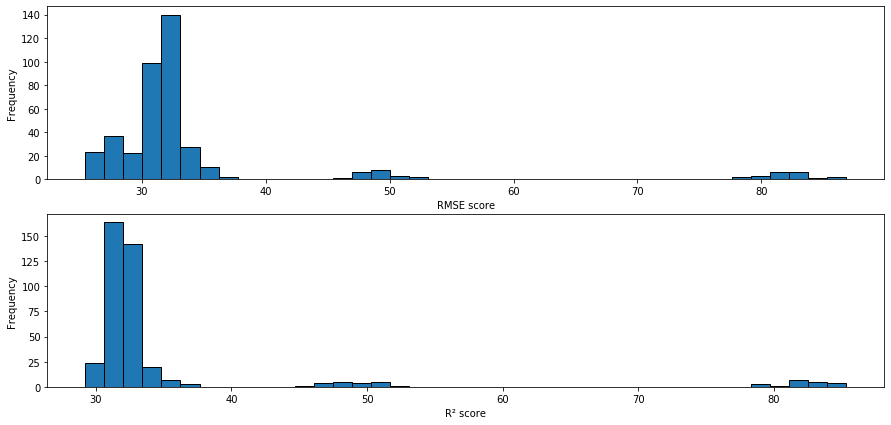

In [84]:
plt.title("radiation results")

plt.subplot(2,1,1)
values_for_each_var.rmse_radiation.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_radiation.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

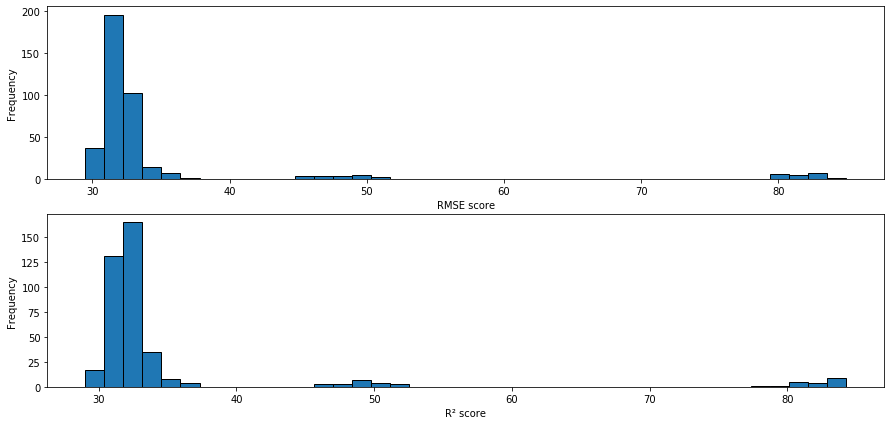

In [85]:
plt.title("precipitation results")

plt.subplot(2,1,1)
values_for_each_var.rmse_precipitation.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_precipitation.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

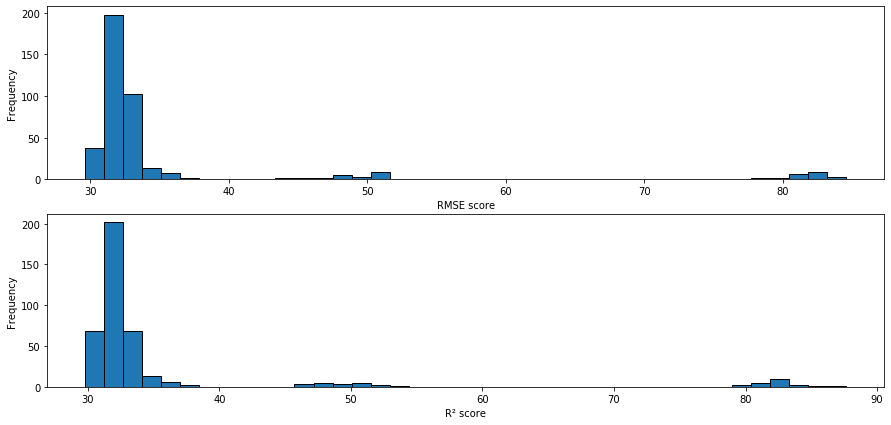

In [86]:
plt.title("diff temp results")

plt.subplot(2,1,1)
values_for_each_var.rmse_diff_temp.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_diff_temp.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

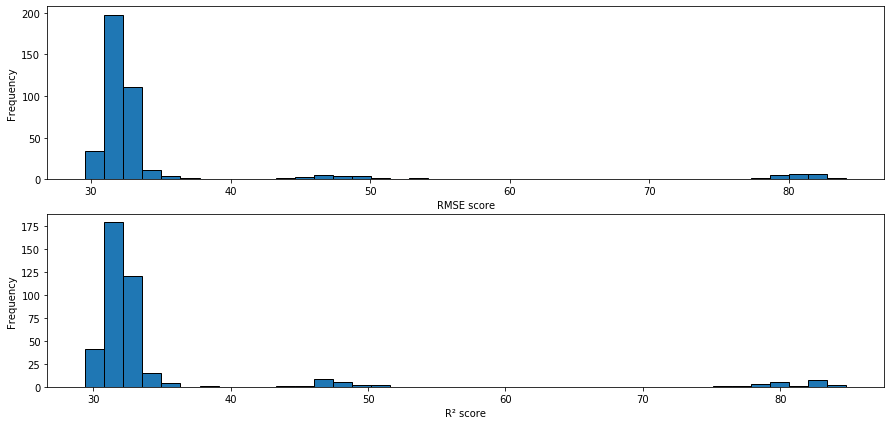

In [87]:
plt.title("diff humidity results")

plt.subplot(2,1,1)
values_for_each_var.rmse_diff_umid.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_diff_umid.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

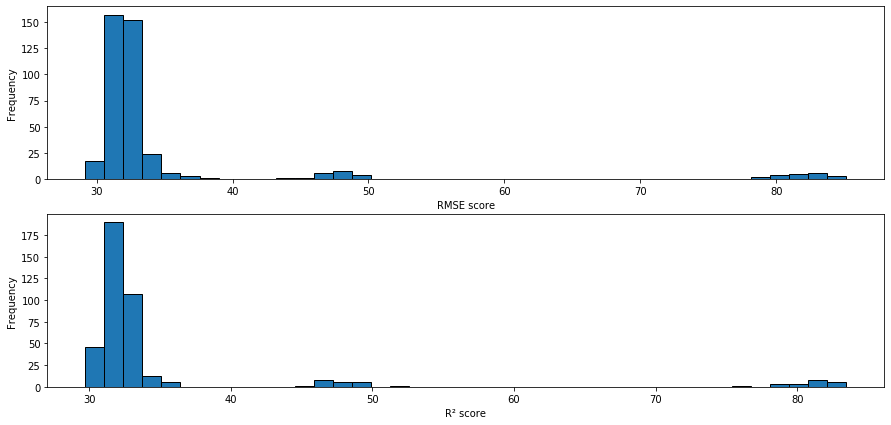

In [88]:
plt.title("diff dew results")

plt.subplot(2,1,1)
values_for_each_var.rmse_diff_dew.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_diff_dew.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

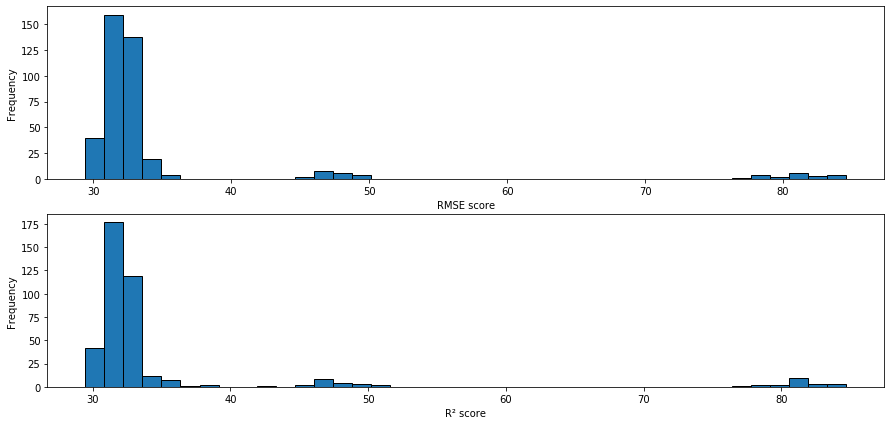

In [89]:
plt.title("diff pressure results")

plt.subplot(2,1,1)
values_for_each_var.rmse_diff_pressure.plot.hist(bins=40,edgecolor="black")
plt.xlabel('RMSE score')

plt.subplot(2,1,2)
values_for_each_var.r2_diff_pressure.plot.hist(bins=40,edgecolor="black")
plt.xlabel('R² score')

plt.show()

In [90]:
values_for_each_var.describe()

,Unnamed: 0,r2_temp_inst,rmse_temp_inst,r2_umid_inst,rmse_umid_inst,r2_pto_orvalho_inst,rmse_pto_orvalho,r2_hour,rmse_hour,r2_pressure,...,r2_precipitation,rmse_precipitation,r2_diff_temp,rmse_diff_temp,r2_diff_umid,rmse_diff_umid,r2_diff_dew,rmse_diff_dew,r2_diff_pressure,rmse_diff_pressure
count,400.000000,400.000000,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,-0.365272,-0.317365,-3.694787e-01,-0.354177,-3.711225e-01,-0.355447,-0.337078,-0.354221,-0.347442,...,35.501217,35.330823,35.500625,35.521502,35.222268,35.343343,35.333671,35.413316,35.302789,35.299241
std,115.614301,1.249178,1.294321,1.255957e+00,1.254642,1.263503e+00,1.218769,1.187899,1.234286,1.210267,...,11.396560,11.302893,11.472082,11.357342,11.066272,11.090109,11.081225,11.244064,11.175027,11.081034
min,0.000000,-6.084712,-6.313456,-6.233201e+00,-6.311931,-6.512467e+00,-6.289148,-5.885807,-6.011398,-6.206891,...,29.029527,29.482747,29.798214,29.651965,29.429042,29.603189,29.742429,29.175996,29.458873,29.433757
25%,99.750000,-0.014169,-0.008535,-1.238108e-02,-0.011550,-1.265739e-02,-0.013759,-0.010994,-0.011615,-0.010685,...,31.546513,31.373136,31.417991,31.570920,31.359070,31.580967,31.521895,31.592582,31.464638,31.549159
50%,199.500000,-0.003326,-0.001300,-3.665944e-03,0.001581,-2.929642e-03,-0.004001,-0.003197,-0.002898,-0.003331,...,32.125442,32.022962,32.052022,32.212431,32.102133,32.189535,32.181466,32.140125,32.111552,32.200989
75%,299.250000,-0.000565,0.014159,-9.197110e-04,0.009770,-5.480833e-04,-0.001348,-0.000540,-0.000539,-0.001036,...,32.978589,32.869370,32.953837,32.992317,32.923854,32.933484,32.846911,32.914617,32.903042,32.908457
max,399.000000,-0.000010,0.330856,-4.569602e-07,0.026096,-1.063282e-08,-0.000053,0.065577,0.010588,0.000013,...,84.276061,84.966340,87.652290,84.595288,84.807256,84.096922,83.454670,85.142241,84.728035,84.579756
